In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashchavan02/Data-Mining-And-Warehousing/main/DMW-miniproject/dataset/student_performance_data.csv')

print("Dataset Shape", df.shape)

print("\n--------------------------------\n")

print(df.head())

print("\n--------------------------------\n")

print(df.info())

print("\n--------------------------------\n")

print(df.isnull().sum())

Dataset Shape (395, 35)

--------------------------------

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout Dalc  Walc  health  absences  G1  G2  G3       Course StudentID  
0     4    1     1       3         6   5   6   6  Mathematics    MATH_1  
1     3    1     1       3         4   5   5   6  Mathematics    MATH_2  
2     2    2     3       3        10   7   8  10  Mathematics    MATH_3  
3     2    1     1       5         2  15  14  15  Mathematics    MATH_4  
4     2    1     2       5         4   6  10  10  Mathematics    MATH_5  

[5 rows x

In [3]:
df1 = df.copy()

label_encoders = {}
categorical_columns = df1.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'StudentID':
        le = LabelEncoder()
        df1[col] = le.fit_transform(df1[col])
        label_encoders[col] = le

print("dataset shape:", df1.shape)

print("\n--------------------------------\n")

print(df1.head())

dataset shape: (395, 35)

--------------------------------

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   goout  Dalc  Walc  health  absences  G1  G2  G3  Course  StudentID  
0      4     1     1       3         6   5   6   6       0     MATH_1  
1      3     1     1       3         4   5   5   6       0     MATH_2  
2      2     2     3       3        10   7   8  10       0     MATH_3  
3      2     1     1       5         2  15  14  15       0     MATH_4  
4      2     1     2       5         4   6  10  10       0     MATH_5  

[5 rows x 35 columns]


In [4]:
df1['Grade_Category'] = (df1['G3'] >= 10).astype(int)

features_to_drop = ['G1', 'G2', 'G3', 'StudentID', 'Grade_Category']
X = df1.drop(columns=features_to_drop)
y = df1['Grade_Category']

print(X.shape, y.shape)

print("\n--------------------------------\n")

print(y.value_counts())

(395, 31) (395,)

--------------------------------

Grade_Category
1    265
0    130
Name: count, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=37)

model = DecisionTreeClassifier( max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=37 )

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=37)

In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Results")

print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Results
Accuracy: 0.6869

Classification Report:
              precision    recall  f1-score   support

        Fail       0.61      0.50      0.55        38
        Pass       0.72      0.80      0.76        61

    accuracy                           0.69        99
   macro avg       0.67      0.65      0.66        99
weighted avg       0.68      0.69      0.68        99


Confusion Matrix:
[[19 19]
 [12 49]]


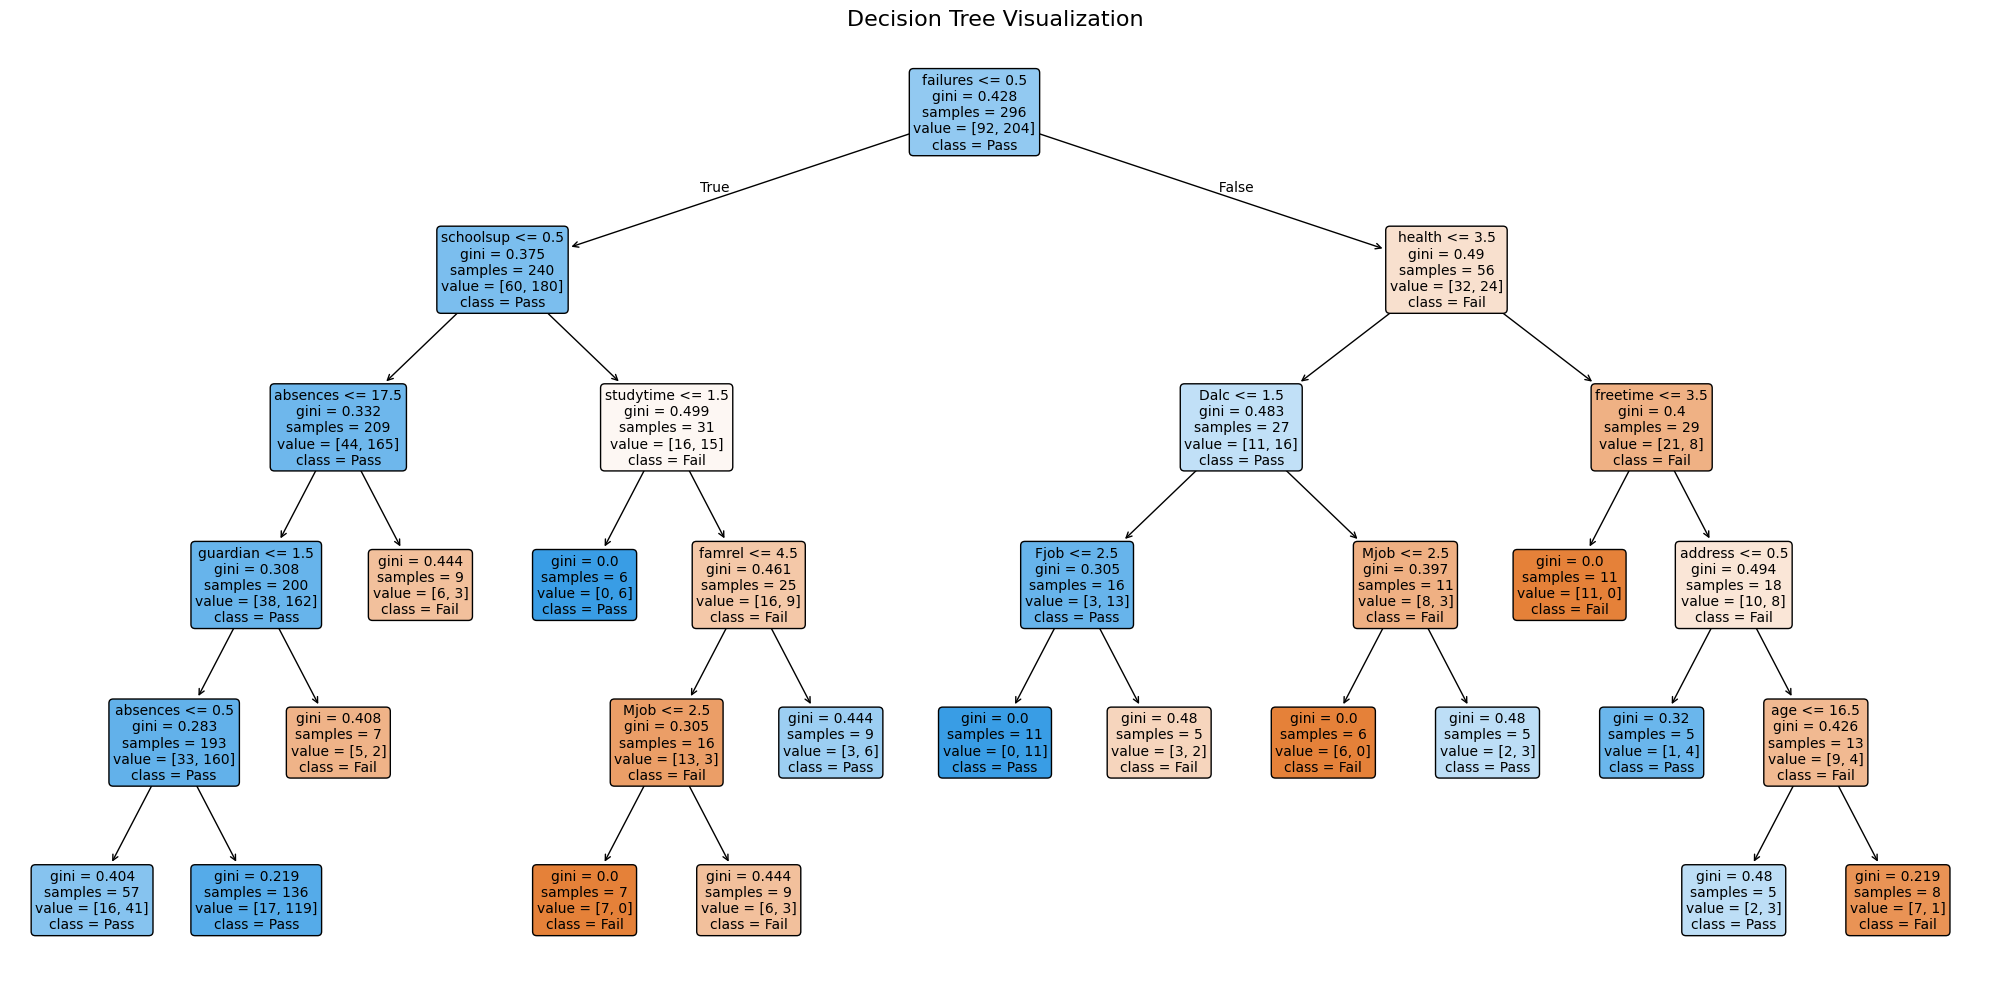

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Fail', 'Pass'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()


Top 10 Important Features:
      Feature  Importance
14   failures    0.192907
29   absences    0.120511
15  schoolsup    0.103677
11   guardian    0.081993
13  studytime    0.081501
26       Dalc    0.078098
8        Mjob    0.058365
28     health    0.057680
24   freetime    0.055459
23     famrel    0.054383

--------------------------------



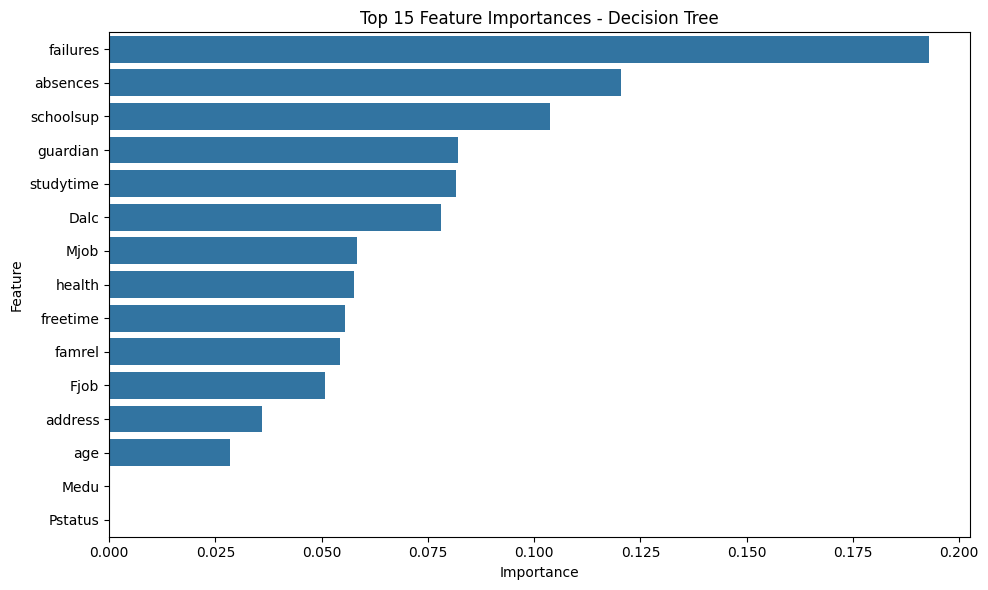

In [8]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

print("\n--------------------------------\n")

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [9]:
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                      'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                      'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

X_cluster = df[numerical_features].copy()

X_cluster = X_cluster.fillna(X_cluster.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Shape:", X_scaled.shape)

print("\n--------------------------------\n")

print(numerical_features)

Shape: (395, 16)

--------------------------------

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


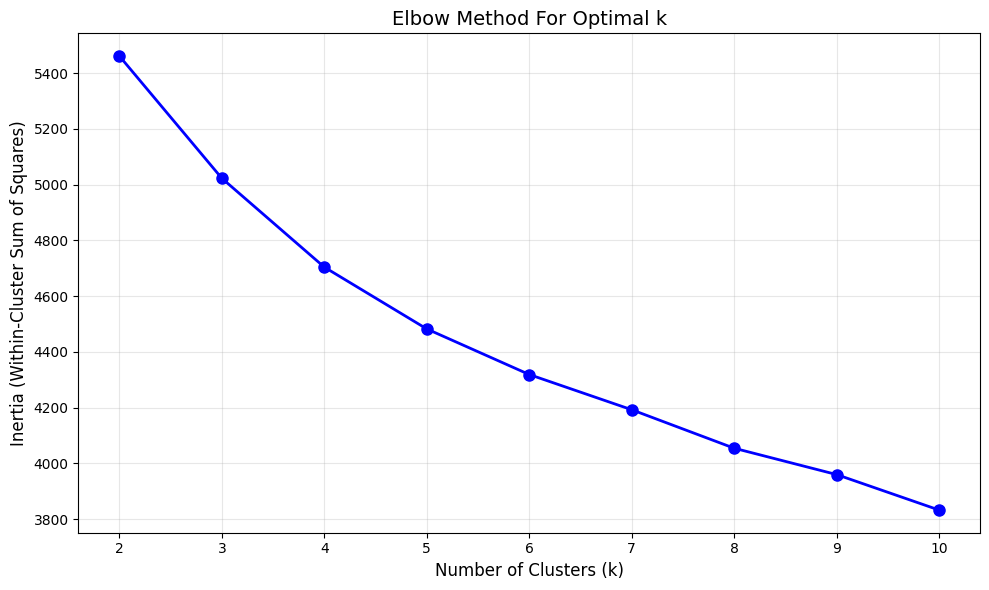

In [10]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
optimal_k_is = 3

kmeans = KMeans(n_clusters=optimal_k_is, random_state=37, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels

print(df['Cluster'].value_counts().sort_index())

Cluster
0     90
1    174
2    131
Name: count, dtype: int64


In [12]:
cluster_summary = df.groupby('Cluster')[numerical_features].mean()

print(cluster_summary.round(2))

print("\n--------------------------------\n")

print(df['Cluster'].value_counts().sort_index())

           age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
Cluster                                                                         
0        16.94  3.09  2.80        1.63       1.73      0.37    3.82      3.77   
1        16.50  3.06  2.76        1.32       2.23      0.08    4.01      3.07   
2        16.79  2.11  2.02        1.50       1.98      0.65    3.94      3.09   

         goout  Dalc  Walc  health  absences     G1     G2     G3  
Cluster                                                            
0         4.02  2.60  3.84    3.88      8.99  10.11  10.10   9.89  
1         2.68  1.11  1.72    3.35      4.79  13.46  13.47  13.72  
2         3.05  1.20  1.98    3.60      4.67   8.07   7.47   6.39  

--------------------------------

Cluster
0     90
1    174
2    131
Name: count, dtype: int64


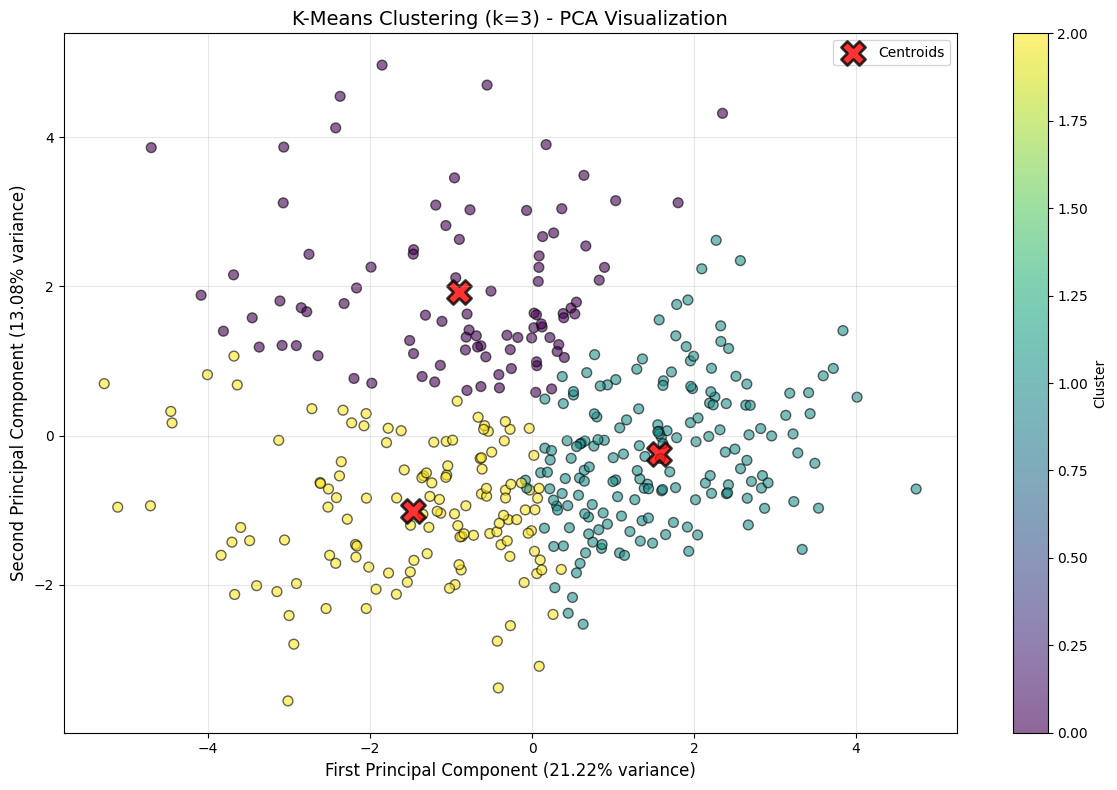

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=cluster_labels,
                     cmap='viridis',
                     s=50,
                     alpha=0.6,
                     edgecolors='black')

centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red',
           s=300,
           alpha=0.8,
           marker='X',
           edgecolors='black',
           linewidths=2,
           label='Centroids')

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title(f'K-Means Clustering (k={optimal_k_is}) - PCA Visualization', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()